 # Mini-Project 6 
 ## Effect of prior in classification for forest cover 
 ## George Tzanetakeis
## CSC421
## Jiazhuo Jiang
## V00892165
 
 
This project is based on material from Chapter 18 Learning from examples. 

You will be experimenting with the forest cover dataset that is easy to load and experiment with using sklearn. 
Here is information about it: 
https://scikit-learn.org/stable/datasets/real_world.html#forest-covertypes
 

1. Create a binary classification subset by only consider type 1 (spruce/fir) and type2 (lodgepole pine). Calculate the classification accuracy of a random forest classifier using the default settings using half the instances for training and half the instances for testing **(basic - 2 points)**
2. Do a comparison of different classifiers in terms of accuracy for the same data as the previous question - you can adapt the code from:  https://scikitlearn.org/stable/auto_examples/classification/plot_classifier_comparison.html to calculate the accuaracy for each classifier **(basic - 2 points)** 
3. Examine the effect of class imbalance on classification using the random forest classifier. To do so resample the training set so that there class proportions for type 1 and type 2 in the training data are: 0.9-0.1, 0.8-0.2, 0.7-0.3, 0.6-0.4 and original (which is close to 0.5-0.5). **(expected - 2 points)**  
4. Convert the dataset to two dimensions using Principal Component Analsysis. Repeat the analysis of question 2 using the best performing classifier trained using the different imbalanced datasets from the previous question and now that the data is 2D adding the plots from the plot_classifier_comparison example from sklearn **(expected - 2 points)** 
5. For this question the goal is to explore what happens when the class priors in the training data are different from the class priors in the testing data. Consider the same class propoportions for training as in question 3 as well as well as using them for the test set. There will be a total of 5(train) by 5 (test) = 25 configurations. For each configuration run all the classifiers from question 2. Comment on the results and try to identify the best classifier in terms of robustness to mismatch of class priors between training and testing. **(advanced - 2 points)**  
 


In [1]:
from sklearn.datasets import fetch_covtype
import pandas as pd
import numpy as np

DATA = fetch_covtype()
feature,target = DATA.data, DATA.target
print('feature.shape: ',feature.shape)
print('target.shape: ',target.shape)

index = np.where((target==1) | (target==2))[0]
new_feature = feature[index,:]
new_target = target[index]
print('new_feature.shape: ',new_feature.shape)
print('new_target.shape: ',new_target.shape)

feature.shape:  (581012, 54)
target.shape:  (581012,)
new_feature.shape:  (495141, 54)
new_target.shape:  (495141,)


#1

In [2]:
#1 Create a binary classification subset by only consider type 1 (spruce/fir) and type2 (lodgepole pine). 
# Calculate the classification accuracy of a random forest classifier using the default settings 
# using half the instances for training and half the instances for testing

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

sc = StandardScaler()
tmp_data = sc.fit_transform(new_feature)

convert_list = np.unique(new_target).tolist()
for ele in convert_list:
    LE = LabelEncoder()
    LE.fit(new_target)
    #print(LE.classes_)
    tmp_label = LE.transform(new_target)

print('tmp_data.shape: ',tmp_data.shape)
print('tmp_label.shape: ',tmp_label.shape)

train_X,test_X,train_y,test_y = train_test_split(tmp_data,tmp_label,test_size=0.5,random_state=3)
print('train_X.shape: ',train_X.shape)
print('train_y.shape: ',train_y.shape)
print('test_X.shape: ',test_X.shape)
print('test_y.shape: ',test_y.shape)

RF = RandomForestClassifier()
RF.fit(train_X,train_y.ravel())

pre_y = RF.predict(test_X)
RF_acc_score = accuracy_score(test_y.ravel(),pre_y)
print('Random Forest Classifier Accuracy Score: ', RF_acc_score)

tmp_data.shape:  (495141, 54)
tmp_label.shape:  (495141,)
train_X.shape:  (247570, 54)
train_y.shape:  (247570,)
test_X.shape:  (247571, 54)
test_y.shape:  (247571,)
Random Forest Classifier Accuracy Score:  0.9552815152016997


#2

In [3]:
#2 Do a comparison of different classifiers in terms of accuracy for the same data as the previous question

LR = LogisticRegression()
LR.fit(train_X,train_y.ravel())

pre_y = LR.predict(test_X)
LR_acc_score = accuracy_score(test_y.ravel(),pre_y)
print('Logistic Regression Classifier Accuracy Score: ', LR_acc_score)
print('Random Forest Classifier Accuracy Score: ', RF_acc_score)

Logistic Regression Classifier Accuracy Score:  0.7754220001534913
Random Forest Classifier Accuracy Score:  0.9552815152016997


#3

In [66]:
#3 Examine the effect of class imbalance on classification using the random forest classifier. 
# To do so resample the training set so that there class proportions for type 1 and type 2 in the training data are: 
# 0.9-0.1, 0.8-0.2, 0.7-0.3, 0.6-0.4 and original (which is close to 0.5-0.5)

type1_prop = 0.9
type2_prop = 1-type1_prop

type1_idx = np.where((train_y==0))[0]
type2_idx = np.where((train_y==1))[0]
type1_num = len(type1_idx)
type2_num = len(type2_idx)

type1_feature = train_X[type1_idx,:]
type1_label = train_y[type1_idx]
type2_feature = train_X[type2_idx,:]
type2_label = train_y[type2_idx]

resampe_num = int((type1_prop*type2_num)/type2_prop) - type1_num
prop_data = np.empty((0,train_X.shape[1]),dtype='float')
prop_label = np.array([],dtype='int')

for i in range(13):
    tmp_idx = np.random.permutation(np.arange(type1_feature.shape[0]))
    prop_data = np.vstack((prop_data,type1_feature[tmp_idx,:]))
    prop_label = np.hstack((prop_label,type1_label[tmp_idx]))

print(prop_data.shape)
print(prop_label.shape)

(1376986, 54)
(1376986,)


In [68]:
type1_prop_list = [0.9,0.8,0.7,0.6]
RF_acc_score_list = []

for type1_prop in type1_prop_list:
    type2_prop = 1-type1_prop
    r_num = int((type1_prop*type2_num)/type2_prop)
    
    imb_data = np.empty((0,train_X.shape[1]),dtype='float')
    imb_label = np.array([],dtype='int')
    
    indd1 = np.random.permutation(np.arange(prop_data.shape[0]))[:r_num]
    
    imb_data = np.vstack((imb_data,prop_data[indd1,:],type2_feature))
    imb_label = np.hstack((imb_label,prop_label[indd1],type2_label))
    
    indd2 = np.random.permutation(np.arange(imb_data.shape[0]))
    imb_data = imb_data[indd2,:]
    imb_label = imb_label[indd2]
    
    print(len(np.where((imb_label==0))[0]))
    print(len(np.where((imb_label==1))[0]))
    
    RF1 = RandomForestClassifier()
    RF1.fit(imb_data,imb_label.ravel())

    pre_y1 = RF1.predict(test_X)
    RF_acc_score1 = accuracy_score(test_y.ravel(),pre_y1)
    RF_acc_score_list.append(RF_acc_score1)
    
    print('Random Forest Classifier Accuracy Score(%f-%f): %f'%(type1_prop,type2_prop,RF_acc_score1))

print('Random Forest Classifier Accuracy Score(%f-%f): %f'%(0.5,0.5,RF_acc_score))

1274832
141648
Random Forest Classifier Accuracy Score(0.900000-0.100000): 0.955754
566592
141648
Random Forest Classifier Accuracy Score(0.800000-0.200000): 0.957919
330511
141648
Random Forest Classifier Accuracy Score(0.700000-0.300000): 0.957083
212472
141648
Random Forest Classifier Accuracy Score(0.600000-0.400000): 0.955883
Random Forest Classifier Accuracy Score(0.500000-0.500000): 0.954676


#4

In [69]:
#4 Convert the dataset to two dimensions using Principal Component Analsysis.
# Repeat the analysis of question 2 using the best performing classifier trained using the different imbalanced datasets 
# from the previous question and now that the data is 2D adding the plots from the plot_classifier_comparison example from sklearn

from sklearn.decomposition import PCA
pca = PCA(n_components=2,svd_solver='full')
pca.fit(tmp_data)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
print(pca.n_components_)
pca_data = pca.transform(tmp_data)
pca_label = tmp_label[:]

print('pca_data.shape: ',pca_data.shape)
print('pca_label.shape: ',pca_label.shape)

train_pca_X,test_pca_X,train_pca_y,test_pca_y = train_test_split(pca_data,pca_label,test_size=0.5,random_state=3)
print('train_pca_X.shape: ',train_pca_X.shape)
print('train_pca_y.shape: ',train_pca_y.shape)
print('test_pca_X.shape: ',test_pca_X.shape)
print('test_pca_y.shape: ',test_pca_y.shape)

RF2 = RandomForestClassifier()
RF2.fit(train_pca_X,train_pca_y.ravel())

pre_y2 = RF2.predict(test_pca_X)
RF_acc_score2 = accuracy_score(test_pca_y.ravel(),pre_y2)
print('Random Forest Classifier Accuracy Score(Principal Component Analsysis): ', RF_acc_score2)

[0.07359629 0.05416936]
[3.60622539 2.6543041 ]
2
pca_data.shape:  (495141, 2)
pca_label.shape:  (495141,)
train_pca_X.shape:  (247570, 2)
train_pca_y.shape:  (247570,)
test_pca_X.shape:  (247571, 2)
test_pca_y.shape:  (247571,)
Random Forest Classifier Accuracy Score(Principal Component Analsysis):  0.6035844262857928


In [70]:
LR2 = LogisticRegression()
LR2.fit(train_pca_X,train_pca_y.ravel())

pre_y2 = LR2.predict(test_pca_X)
LR_acc_score2 = accuracy_score(test_pca_y.ravel(),pre_y2)
print('Logistic Regression Classifier Accuracy Score: ', LR_acc_score2)
print('Random Forest Classifier Accuracy Score: ', RF_acc_score2)

Logistic Regression Classifier Accuracy Score:  0.5910991190405984
Random Forest Classifier Accuracy Score:  0.6035844262857928


([], <a list of 0 Text major ticklabel objects>)

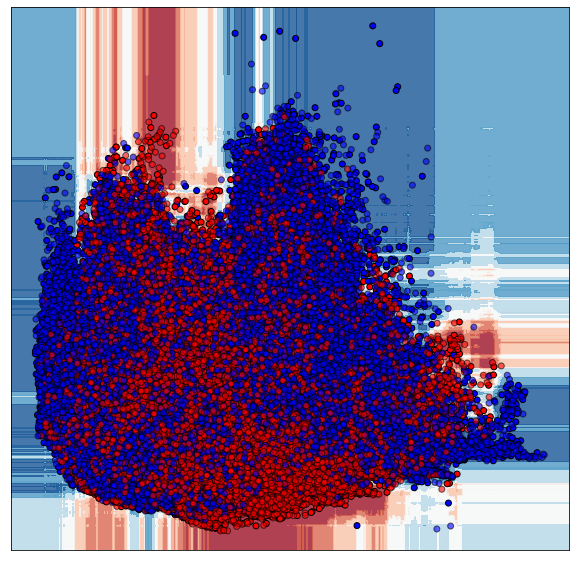

In [76]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

h = 0.02
x_min, x_max = pca_data[:, 0].min() - 0.5, pca_data[:, 0].max() + 0.5
y_min, y_max = pca_data[:, 1].min() - 0.5, pca_data[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

Z = RF2.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
plt.scatter(train_pca_X[:, 0], train_pca_X[:, 1], c=train_pca_y, cmap=cm_bright, edgecolors="k")
plt.scatter(test_pca_X[:, 0], test_pca_X[:, 1], c=test_pca_y, cmap=cm_bright, alpha=0.6, edgecolors="k")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

#5

In [10]:
#5 For this question the goal is to explore what happens when the class priors in the training data are different 
# from the class priors in the testing data. 
# Consider the same class propoportions for training as in question 3 as well as well as using them for the test set. 
# There will be a total of 5(train) by 5 (test) = 25 configurations. 
# For each configuration run all the classifiers from question 2. 
# Comment on the results and try to identify the best classifier in terms of robustness to mismatch of class priors 
# between training and testing.

train_prop_list = [0.1,0.2,0.3,0.4,0.5]
test_prop_list = [0.1,0.2,0.3,0.4,0.5]

RF_score5 = np.zeros((5,5))
LR_score5 = np.zeros((5,5))

#train
train1_idx = np.where((train_y==0))[0]
train2_idx = np.where((train_y==1))[0]
train1_num = len(train1_idx)
train2_num = len(train2_idx)
print('train1_num: ',train1_num)
print('train2_num: ',train2_num)

train1_feature = train_X[train1_idx,:]
train1_label = train_y[train1_idx]
train2_feature = train_X[train2_idx,:]
train2_label = train_y[train2_idx]

#test
test1_idx = np.where((test_y==0))[0]
test2_idx = np.where((test_y==1))[0]
test1_num = len(test1_idx)
test2_num = len(test2_idx)
print('test1_num: ',test1_num)
print('test2_num: ',test2_num)

test1_feature = test_X[test1_idx,:]
test1_label = test_y[test1_idx]
test2_feature = test_X[test2_idx,:]
test2_label = test_y[test2_idx]

for i,train_prop in enumerate(train_prop_list):
    for j,test_prop in enumerate(test_prop_list):
        # train
        train_type2_num = int((train_prop*train1_num)/(1-train_prop))
        
        new_train_data = np.empty((0,train_X.shape[1]),dtype='float')
        new_train_label = np.array([],dtype='int')

        idx1 = np.random.permutation(np.arange(train2_feature.shape[0]))[:train_type2_num]

        new_train_data = np.vstack((new_train_data,train1_feature,train2_feature[idx1,:]))
        new_train_label = np.hstack((new_train_label,train1_label,train2_label[idx1]))

        idx2 = np.random.permutation(np.arange(new_train_data.shape[0]))
        new_train_data = new_train_data[idx2,:]
        new_train_label = new_train_label[idx2]

        print('new_train_type1_num: ',len(np.where((new_train_label==0))[0]))
        print('new_train_type2_num: ',len(np.where((new_train_label==1))[0]))
        #test
        test_type2_num = int((test_prop*test1_num)/(1-test_prop))
        
        new_test_data = np.empty((0,test_X.shape[1]),dtype='float')
        new_test_label = np.array([],dtype='int')
        
        idx3 = np.random.permutation(np.arange(test2_feature.shape[0]))[:test_type2_num]
        
        new_test_data = np.vstack((new_test_data,test1_feature,test2_feature[idx3,:]))
        new_test_label = np.hstack((new_test_label,test1_label,test2_label[idx3]))
        
        idx4 = np.random.permutation(np.arange(new_test_data.shape[0]))
        new_test_data = new_test_data[idx4,:]
        new_test_label = new_test_label[idx4]
        
        print('new_test_type1_num: ',len(np.where((new_test_label==0))[0]))
        print('new_test_type2_num: ',len(np.where((new_test_label==1))[0]))
        
        # Random Forest ClS
        RF5 = RandomForestClassifier(random_state=(i+j))
        RF5.fit(new_train_data,new_train_label.ravel())

        pre_y5 = RF5.predict(new_test_data)
        RF_acc_score5 = accuracy_score(new_test_label.ravel(),pre_y5)
        RF_score5[i][j] = RF_acc_score5
        
        # Logistic Regression CLS
        LR5 = LogisticRegression(random_state=(i+j))
        LR5.fit(new_train_data,new_train_label.ravel())

        pre_y55 = LR5.predict(new_test_data)
        LR_acc_score5 = accuracy_score(new_test_label.ravel(),pre_y55)
        LR_score5[i][j] = LR_acc_score5

        print('Random Forest Classifier Accuracy Score(train: %.1f-%.1f, test: %.1f-%.1f ): %f'%(1-train_prop,train_prop,1-test_prop,test_prop,RF_acc_score5))
        print('Logistic Regression Classifier Accuracy Score(train: %.1f-%.1f, test: %.1f-%.1f ): %f'%(1-train_prop,train_prop,1-test_prop,test_prop,LR_acc_score5))

train1_num:  105922
train2_num:  141648
test1_num:  105918
test2_num:  141653
new_train_type1_num:  105922
new_train_type2_num:  11769
new_test_type1_num:  105918
new_test_type2_num:  11768
Random Forest Classifier Accuracy Score(train: 0.9-0.1, test: 0.9-0.1 ): 0.955687
Logistic Regression Classifier Accuracy Score(train: 0.9-0.1, test: 0.9-0.1 ): 0.910533
new_train_type1_num:  105922
new_train_type2_num:  11769
new_test_type1_num:  105918
new_test_type2_num:  26479
Random Forest Classifier Accuracy Score(train: 0.9-0.1, test: 0.8-0.2 ): 0.915542
Logistic Regression Classifier Accuracy Score(train: 0.9-0.1, test: 0.8-0.2 ): 0.832745
new_train_type1_num:  105922
new_train_type2_num:  11769
new_test_type1_num:  105918
new_test_type2_num:  45393
Random Forest Classifier Accuracy Score(train: 0.9-0.1, test: 0.7-0.3 ): 0.872250
Logistic Regression Classifier Accuracy Score(train: 0.9-0.1, test: 0.7-0.3 ): 0.754796
new_train_type1_num:  105922
new_train_type2_num:  11769
new_test_type1_num:

In [11]:
print('Random Forest Classifier Accuracy Score: ')
print(RF_score5)
print('Logistic Regression Classifier Accuracy Score: ')
print(LR_score5)

Random Forest Classifier Accuracy Score: 
[[0.95568717 0.91554189 0.87224987 0.83259503 0.78790196]
 [0.96814404 0.94518758 0.92401742 0.90015861 0.88095508]
 [0.9670819  0.95540684 0.94539062 0.93264034 0.92255802]
 [0.96066652 0.95548993 0.95067113 0.94783323 0.94349874]
 [0.94605985 0.94899431 0.94987807 0.94995751 0.95190147]]
Logistic Regression Classifier Accuracy Score: 
[[0.91053311 0.83274545 0.75479641 0.6787175  0.60079023]
 [0.89816971 0.84448288 0.79019371 0.73762533 0.68312751]
 [0.87353636 0.84033626 0.8044359  0.76988047 0.73475708]
 [0.83568989 0.81717108 0.79927434 0.78170283 0.76343492]
 [0.77897116 0.77622605 0.77532367 0.77470118 0.7731547 ]]


In [ ]:
# Random Forest better than logistic regression；
# In the results of the same classifier, the larger the difference between the proportions of the training set and the test set, the worse the performance.
# When the ratio of the two classes in the training set is 0.5:0.5, the performance is comparable regardless of the ratio of the test set.